# Data Understanding

Import Library

In [3]:
# Import Library
import pandas as pd  # Untuk memuat dan memproses data
import numpy as np  # Untuk manipulasi data numerik
import matplotlib.pyplot as plt  # Untuk visualisasi data
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split  # Untuk membagi data menjadi data latih dan uji
from sklearn.ensemble import RandomForestRegressor  # Untuk model Random Forest
from sklearn.linear_model import LinearRegression # Untuk Linear Regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Untuk evaluasi model


 Kode ini mempersiapkan library yang diperlukan untuk melakukan analisis data yang melibatkan regresi, mulai dari pemrosesan data, visualisasi, pembagian data, pemodelan menggunakan algoritma seperti Random Forest dan Linear Regression, hingga evaluasi kinerja model.

In [4]:
# Memuat data dari file Excel
df = pd.read_csv('data.csv')

# Menampilkan beberapa data awal
df


,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
...,...,...,...,...,...,...,...,...
1005,1006,Rumah Strategis Akses Jalan 2mobil Di Menteng ...,9000000000,450,550,10,10,3
1006,1007,Tebet Rumah Siap Huni Jln 2 Mbl Nyaman,4000000000,160,140,4,3,2
1007,1008,"Di Kebun Baru Rumah Terawat, Area Strategis",4000000000,139,230,4,4,1
1008,1009,Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...,19000000000,360,606,7,4,0


Output yang ditampilkan adalah representasi dari DataFrame df yang baru saja dimuat dari file 'DATA RUMAH.xlsx'. Berikut adalah penjelasan kolom-kolom dan beberapa baris data:
- NO: Nomor urut dari data rumah.
- NAMA RUMAH: Nama atau deskripsi singkat dari rumah yang dijual.
- HARGA: Harga jual rumah dalam Rupiah (terlihat dari angkanya yang besar).
- LB: Luas Bangunan, kemungkinan dalam meter persegi.
- LT: Luas Tanah, kemungkinan dalam meter persegi.
- KT: Jumlah Kamar Tidur.
- KM: Jumlah Kamar Mandi.
- GRS: Jumlah Garasi atau Carport.

Data Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.3+ KB


Informasi dari df.info() sangat berguna untuk memahami struktur dasar data kita sebelum melakukan analisis lebih lanjut. Kita tahu jumlah data, nama-nama kolom, apakah ada nilai yang hilang, dan tipe data setiap kolom.

- Jumlah Baris dan Kolom: DataFrame df memiliki 1010 baris dan 8 kolom.
- Tidak Ada Nilai Null: Semua kolom memiliki 1010 nilai non-null, yang berarti tidak ada data yang hilang (missing values) dalam DataFrame ini. Jadi tidak perlu penanganan.
- Tipe Data: Kita dapat melihat tipe data untuk setiap kolom. Sebagian besar kolom numerik (NO, HARGA, LB, LT, KT, KM, GRS) terdeteksi sebagai integer (int64), yang sesuai. Kolom NAMA RUMAH terdeteksi sebagai 'object', yang kemungkinan berisi teks (string) deskripsi nama rumah.


Statistik Deskriptif

In [6]:
df.describe()

,NO,HARGA,LB,LT,KT,KM,GRS
count,1010.000000,1.010000e+03,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,505.500000,7.628987e+09,276.539604,237.432673,4.668317,3.607921,1.920792
std,291.706188,7.340946e+09,177.864557,179.957604,1.572776,1.420066,1.510998
min,1.000000,4.300000e+08,40.000000,25.000000,2.000000,1.000000,0.000000
25%,253.250000,3.262500e+09,150.000000,130.000000,4.000000,3.000000,1.000000
50%,505.500000,5.000000e+09,216.500000,165.000000,4.000000,3.000000,2.000000
75%,757.750000,9.000000e+09,350.000000,290.000000,5.000000,4.000000,2.000000
max,1010.000000,6.500000e+10,1126.000000,1400.000000,10.000000,10.000000,10.000000


Output dari df.describe() memberikan statistik deskriptif penting untuk kolom-kolom numerik dalam DataFrame df. Statistik ini meliputi:

- count: Jumlah total data (non-null) untuk setiap kolom (semuanya 1010).
mean: Nilai rata-rata untuk setiap kolom. Terlihat rata-rata harga rumah cukup tinggi (sekitar 7.6 miliar).
- std: Standar deviasi, mengukur penyebaran data. Harga rumah memiliki standar deviasi yang sangat tinggi, menandakan variasi harga yang besar.
- min: Nilai minimum untuk setiap kolom.
- 25%: Kuartil pertama (nilai di mana 25% data berada di bawahnya).
- 50%: Median atau kuartil kedua (nilai tengah data).
- 75%: Kuartil ketiga (nilai di mana 75% data berada di bawahnya).
- max: Nilai maksimum untuk setiap kolom.

Cek Missing Value

In [7]:
df.isnull().sum()

,0
NO,0
NAMA RUMAH,0
HARGA,0
LB,0
LT,0
KT,0
KM,0
GRS,0


Dengan demikian, DataFrame df tidak mengandung nilai yang hilang pada semua kolomnya. Ini berarti tidak diperlukan penanganan khusus terkait missing values untuk analisis lebih lanjut.

Cek Duplikasi

In [8]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1005,False
1006,False
1007,False
1008,False


Data tidak mengandung duplikat

Distribusi Data

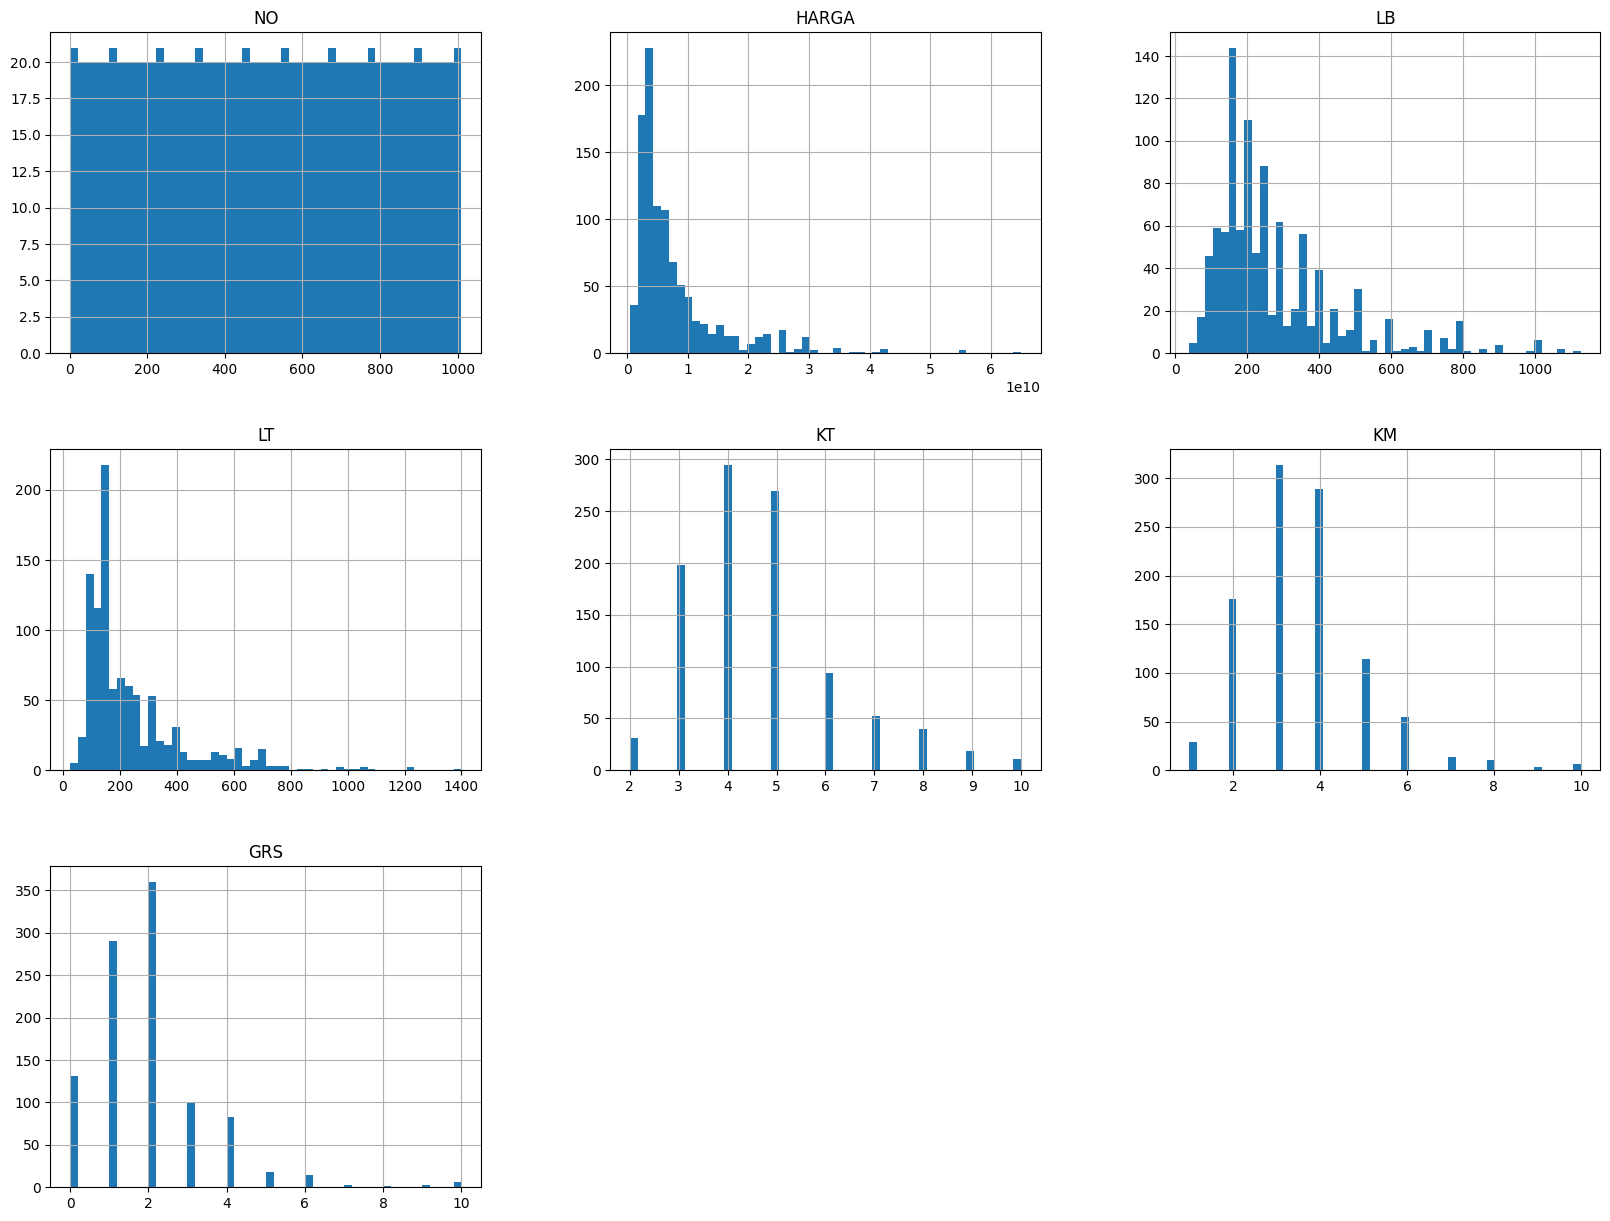

In [9]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

- Histogram untuk kolom 'NO' menunjukkan distribusi seragam karena merupakan indeks. Histogram 'HARGA' dan 'LB' keduanya miring ke kanan, mengindikasikan bahwa sebagian besar rumah memiliki harga dan luas bangunan yang lebih rendah, dengan beberapa rumah memiliki nilai yang jauh lebih tinggi. Distribusi 'LB' juga menunjukkan beberapa puncak.
- Histogram 'LT' (Luas Tanah) miring ke kanan, dengan banyak rumah memiliki luas tanah kecil dan beberapa memiliki luas tanah besar. Histogram 'KT' (Jumlah Kamar Tidur) dan 'KM' (Jumlah Kamar Mandi) menunjukkan distribusi diskrit, dengan frekuensi tertinggi pada 4 dan 5 kamar tidur, serta 3 kamar mandi.
ringkas
- Histogram 'GRS' (Jumlah Garasi/Carport) menunjukkan distribusi diskrit dengan frekuensi tertinggi pada 2 garasi/carport, diikuti oleh 1.

Matriks Korelasi

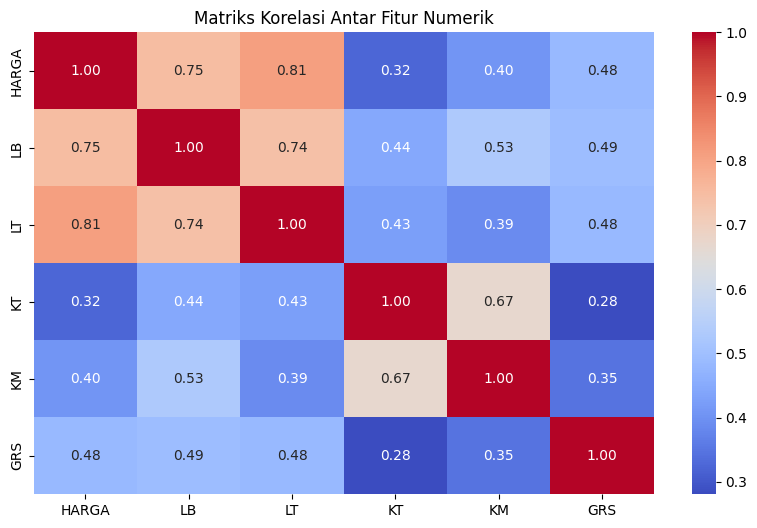

In [10]:

# Pilih hanya kolom-kolom numerik
numerical_df = df[['HARGA', 'LB', 'LT', 'KT', 'KM', 'GRS']]

# Hitung matriks korelasi hanya pada kolom numerik
corr_matrix = numerical_df.corr()

# Buat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Antar Fitur Numerik') # Tambahkan judul agar lebih jelas
plt.show()

- Harga berkorelasi positif kuat dengan Luas Tanah (0.81) dan Luas Bangunan (0.75).
- Luas Tanah dan Luas Bangunan juga berkorelasi positif kuat (0.74).
- Jumlah Kamar Tidur dan Jumlah Kamar Mandi berkorelasi positif cukup kuat (0.67).
- Korelasi fitur lainnya cenderung lebih lemah.

# Data Preparation

Pisahkan Fitur dan Target

In [11]:
# Memilih fitur dan target
features = df[['LB', 'LT', 'KT', 'KM', 'GRS']]  # Fitur yang digunakan untuk prediksi harga
target = df['HARGA']  # Kolom target yang berisi harga rumah

'LB', 'LT', 'KT', 'KM', dan 'GRS' dari DataFrame df dan menyimpannya sebagai variabel features. Kolom 'HARGA' dipilih dan disimpan sebagai variabel target. Dengan demikian, features akan digunakan sebagai input untuk memprediksi target (harga rumah) dalam langkah pemodelan selanjutnya.

Split Data

In [12]:
# 2. Membagi data menjadi data latih dan data uji (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


# Modeling

Random Forest Regressor

In [13]:
# Membuat dan melatih model Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
# Melakukan prediksi pada data uji
y_pred_rf = rf_model.predict(X_test)


Linear Regression

In [14]:
# Membuat dan melatih model Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
# Melakukan prediksi pada data uji dengan Linear Regression
y_pred_lr = lr_model.predict(X_test)

# Evaluation

Evaluasi Random Forest Regressor

In [15]:

# Evaluasi model menggunakan MAE, MSE, RMSE, dan R²
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)  # Tambahan RMSE
r2_rf = r2_score(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print(f'Mean Absolute Error (MAE) - Random Forest: {mae_rf}')
print(f'Mean Squared Error (MSE) - Random Forest: {mse_rf}')
print(f'Root Mean Squared Error (RMSE) - Random Forest: {rmse_rf}')
print(f'R-squared (R²) - Random Forest: {r2_rf}')


Mean Absolute Error (MAE) - Random Forest: 1759550222.1703582
Mean Squared Error (MSE) - Random Forest: 1.0635204265435824e+19
Root Mean Squared Error (RMSE) - Random Forest: 3261166089.8267393
R-squared (R²) - Random Forest: 0.772181577855092


Evaluasi Linear Regression

In [16]:
# Evaluasi model Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)  # Tambahan RMSE
r2_lr = r2_score(y_test, y_pred_lr)

# Menampilkan hasil evaluasi untuk model Linear Regression
print("Evaluasi Model Linear Regression:")
print(f'Mean Absolute Error (MAE) - Linear Regression: {mae_lr}')
print(f'Mean Squared Error (MSE) - Linear Regression: {mse_lr}')
print(f'Root Mean Squared Error (RMSE) - Linear Regression: {rmse_lr}')
print(f'R-squared (R²) - Linear Regression: {r2_lr}')


Evaluasi Model Linear Regression:
Mean Absolute Error (MAE) - Linear Regression: 1980345761.1519253
Mean Squared Error (MSE) - Linear Regression: 1.0675729074057431e+19
Root Mean Squared Error (RMSE) - Linear Regression: 3267373421.2754793
R-squared (R²) - Linear Regression: 0.7713134894077545


- Metrik evaluasi menunjukkan bahwa Random Forest memiliki kinerja prediksi yang sedikit lebih baik daripada Linear Regression.
- Random Forest memiliki MAE dan RMSE yang lebih rendah, yang berarti rata-rata kesalahan prediksinya lebih kecil. Nilai R-squared Random Forest juga sedikit lebih tinggi, menunjukkan kemampuannya yang sedikit lebih baik dalam menjelaskan varians harga rumah.
- Meskipun demikian, nilai MSE yang besar pada kedua model mengindikasikan adanya kesalahan prediksi yang signifikan pada beberapa data poin. Secara keseluruhan, Random Forest memberikan prediksi yang sedikit lebih akurat.

In [17]:
# Simpan model ke file .pkl
joblib.dump(rf_model, 'model.pkl')

['model.pkl']